In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow_hub as hub

In [2]:
df = pd.read_csv(r'nlp-getting-started/train.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
#nnlm-en-dim50 - embedding

In [78]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy()
    labels = df.pop('target')
    df = df['text']
    ds = tf.data.Dataset.from_tensor_slices((df, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds

In [20]:
!ls

NG_Test_Notebook.ipynb
NLP_EDA_CLEANING_ ROUND_1.ipynb
NLP_EDA_CLEANING_ ROUND_2.ipynb
NLP_EDA_CLEANING_ ROUND_3.ipynb
NLP_EDA_CLEANING_ ROUND_4.ipynb
NLP_EDA_CLEANING_ ROUND_5.ipynb
README.md
TF_GPU Notebook.ipynb
final_clean_text.csv
nlp-getting-started


In [21]:
cleaned = pd.read_csv('final_clean_text.csv')

In [23]:
data = cleaned[['text','target']]

In [24]:
data

,text,target
0,reason,1
1,forest fire near la canada,1
2,resident ask shelter place officer evacuation ...,1
3,people evacuation order california,1
4,get send photo smoke school,1
...,...,...
7608,giant crane hold bridge collapse nearby home,1
7609,control wild fire california northern state,1
7610,m utc km s volcano hawaii,1
7611,police investigate e bike collide car little e...,1


In [40]:
data.dropna(subset='text',inplace=True)

C:\Users\Nel-Jiren\AppData\Local\Temp\ipykernel_2376\1237765203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset='text',inplace=True)


In [41]:
data

,text,target
0,reason,1
1,forest fire near la canada,1
2,resident ask shelter place officer evacuation ...,1
3,people evacuation order california,1
4,get send photo smoke school,1
...,...,...
7608,giant crane hold bridge collapse nearby home,1
7609,control wild fire california northern state,1
7610,m utc km s volcano hawaii,1
7611,police investigate e bike collide car little e...,1


In [79]:
train,val,test = np.split(data.sample(frac=1),[int(0.8*len(data)),int(0.9*len(data))])

In [80]:
train['target'] = train['target'].astype(np.float32)
val['target'] = val['target'].astype(np.float32)
test['target'] = test['target'].astype(np.float32)

In [81]:
train_data = df_to_dataset(train)
val_data = df_to_dataset(val)
test_data = df_to_dataset(test)


In [82]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [83]:
#Embedding
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding,dtype=tf.string,trainable=True)

In [85]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(32, 50), dtype=float32, numpy=
array([[ 0.03852159, -0.08648715, -0.06310192, ..., -0.18678999,
         0.11386462, -0.09460337],
       [ 0.4262566 , -0.35200092, -0.35610086, ..., -0.13426721,
         0.06249361,  0.00480677],
       [ 0.08526707, -0.36245224, -0.23816806, ...,  0.14466585,
         0.15532365,  0.09154053],
       ...,
       [ 0.03080357, -0.13285078, -0.19268598, ...,  0.25264463,
         0.21641956,  0.23369943],
       [ 0.2506481 , -0.0061364 , -0.08694553, ..., -0.1694531 ,
         0.25572866,  0.29098326],
       [ 0.04825676, -0.4571292 , -0.05551463, ..., -0.18179433,
         0.39687753,  0.193956  ]], dtype=float32)>

In [98]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [99]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [100]:
history = model.fit(train_data,epochs=10,validation_data = val_data)

Epoch 1/10
190/190 [==============================] - 5s 25ms/step - loss: 0.3790 - accuracy: 0.8563 - val_loss: 0.6379 - val_accuracy: 0.7447
Epoch 2/10
190/190 [==============================] - 5s 24ms/step - loss: 0.2418 - accuracy: 0.8954 - val_loss: 0.7048 - val_accuracy: 0.7579
Epoch 3/10
190/190 [==============================] - 5s 26ms/step - loss: 0.2113 - accuracy: 0.9091 - val_loss: 0.8007 - val_accuracy: 0.7540
Epoch 4/10
190/190 [==============================] - 5s 28ms/step - loss: 0.1890 - accuracy: 0.9211 - val_loss: 0.9029 - val_accuracy: 0.7540
Epoch 5/10
190/190 [==============================] - 5s 25ms/step - loss: 0.1709 - accuracy: 0.9278 - val_loss: 1.0000 - val_accuracy: 0.7487
Epoch 6/10
190/190 [==============================] - 5s 25ms/step - loss: 0.1557 - accuracy: 0.9326 - val_loss: 1.0705 - val_accuracy: 0.7513
Epoch 7/10
190/190 [==============================] - 5s 26ms/step - loss: 0.1418 - accuracy: 0.9418 - val_loss: 1.2105 - val_accuracy: 0.7526

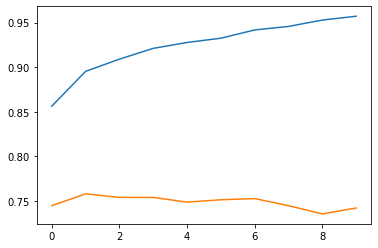

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


In [102]:
#LSTM

In [103]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label:text))

In [104]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'like', 'fire', 'new', 'go', 'get', 'people', 'year',
       'video', 'time', 'burn', 'bomb', 'kill', 'crash', 'emergency',
       'come', 'body', 'attack', 'want'], dtype='<U13')

In [107]:
model2 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
    input_dim = len(encoder.get_vocabulary()),
    output_dim=32,
    mask_zero=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [108]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [109]:
history2 = model2.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
190/190 [==============================] - 20s 21ms/step - loss: 0.5631 - accuracy: 0.7150 - val_loss: 0.4834 - val_accuracy: 0.7698
Epoch 2/10
190/190 [==============================] - 3s 14ms/step - loss: 0.3963 - accuracy: 0.8319 - val_loss: 0.4906 - val_accuracy: 0.7712
Epoch 3/10
190/190 [==============================] - 3s 13ms/step - loss: 0.3500 - accuracy: 0.8558 - val_loss: 0.5259 - val_accuracy: 0.7765
Epoch 4/10
190/190 [==============================] - 3s 14ms/step - loss: 0.3227 - accuracy: 0.8704 - val_loss: 0.5531 - val_accuracy: 0.7606
Epoch 5/10
190/190 [==============================] - 3s 13ms/step - loss: 0.3051 - accuracy: 0.8787 - val_loss: 0.6267 - val_accuracy: 0.7646
Epoch 6/10
190/190 [==============================] - 3s 13ms/step - loss: 0.2825 - accuracy: 0.8927 - val_loss: 0.6340 - val_accuracy: 0.7553
Epoch 7/10
190/190 [==============================] - 3s 13ms/step - loss: 0.2585 - accuracy: 0.8998 - val_loss: 0.6667 - val_accuracy: 0.764

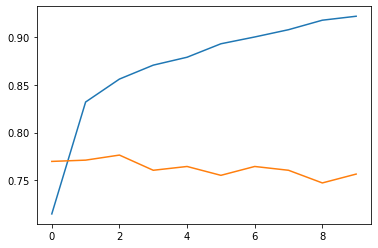

In [110]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.show()